<a href="https://colab.research.google.com/github/micsupasun/university_of_essex/blob/main/neural_networks_and_deep_learning/assignmentv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [ ]:
# file
import scipy.io as io
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report


from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

# IMPORT DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = io.loadmat("/content/drive/MyDrive/essex_university/natural_network_and_deep_learning/WLDataCW.mat")
# data

# CLEAN DATA

In [ ]:
data['data'].shape,data['label'].shape

((62, 512, 360), (1, 360))

In [ ]:
data_array = data['data'].reshape((62*512),360)
label_array = data['label']
print(data_array.shape,label_array.shape)

(31744, 360) (1, 360)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_array.T, label_array.T, test_size=0.2)
print("X_train_len:",len(X_train),"X_test_len:",len(X_test),"y_train_len:",len(y_train),"y_test_len:",len(y_test))
print("X_train_shape:",X_train.shape,"X_test_shape:",X_test.shape,"y_train_shape:",y_train.shape,"y_test_shape:",y_test.shape)


X_train_len: 288 X_test_len: 72 y_train_len: 288 y_test_len: 72
X_train_shape: (288, 31744) X_test_shape: (72, 31744) y_train_shape: (288, 1) y_test_shape: (72, 1)


In [ ]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)
# scaler = StandardScaler()
# data_array_scaler = scaler.fit_transform(data_array)
# label_array_scaler = scaler.fit_transform(label_array)

In [ ]:
X_train_scaler.shape,y_train.shape

((288, 31744), (288, 1))

# ACTIVATION FUNCTION

In [ ]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

def tanh(z):
  return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def relu(z):
    return max(0,z)

def leaky_relu(z):
    return max(0.1*z,z)

# FORWARD PROPAGATION

In [ ]:
def forward_propagation(x,weight,bias):
  # y = mx + c
  z = np.dot(weight.T,x) + bias
  # sigmoid
  y_hat = sigmoid(z)
  return y_hat

# LOST FUNCTION

In [ ]:
def loss_function(x,y,y_hat):
  k = x.shape[0]
  # mse
  loss = (1/k) * (np.sum((abs(y_hat - y)) ** 2))
  # loss =  -np.mean((y * np.log(y_hat)) + ((1-y) * np.log(1-y_hat)))
  return loss

# BACKWARD PROPAGATION

In [ ]:
def backward_propagation(x,y,y_hat):
  k = x.shape[0]

  weight_derivative = (1/k) * (np.dot(x,(y_hat-y).T))
  bias_derivative = (1/k) * (np.sum((y_hat-y)))
  
  return weight_derivative,bias_derivative

In [ ]:
def weight_bias_updating(weight,bias,weight_derivative,bias_derivative,learning_rate):
  weight = weight - (learning_rate * weight_derivative)
  bias = bias - (learning_rate * bias_derivative)

  return weight,bias



# TRAIN MODEL

In [ ]:
def train_model_lab_six(x,y):
  weight = np.full((31744,1),0.01)
  # bias = np.full((1,1),0) 
  bias = 0.01
  loss_limit = 0.0001
  iterations = 3000
  learning_rate = 0.01
  for epoch in range(iterations):
    y_hat = forward_propagation(x,weight,bias)
    loss = loss_function(x,y,y_hat)
    weight_derivative, bias_derivative = backward_propagation(x,y,y_hat)
    weight,bias = weight_bias_updating(weight,bias,weight_derivative,bias_derivative,learning_rate)
    # print("==============================================")
    # print(f"loss:{loss}\niterations:{epoch}")
    # print("==============================================")

    if loss <= loss_limit:
      break
  return y_hat,loss,weight_derivative,bias_derivative,weight,bias

In [ ]:
y_hat,loss,weight_derivative,bias_derivative,weight,bias = train_model_lab_six(X_train_scaler.T,y_train.T)

# ACCURACY

SHOW ACCURACY TRAIN DATA AND TEST DATA
train data have accuracy 98% but in test data have accuracy 56%
train data has more than 40 percent accuracy than test data even though it is from the same data set, it can be concluded that the model is overfitting

In [ ]:
def show_prediction(y_pred):
  list_temp_pred = []
  for i in range(len(y_pred.flatten())):
    if y_pred.flatten()[i] >= 0.5:
      list_temp_pred.append(1)
    else:
      list_temp_pred.append(0)
  return list_temp_pred
y_train_predict = show_prediction(y_hat)
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       139
           1       0.99      0.97      0.98       149

    accuracy                           0.98       288
   macro avg       0.98      0.98      0.98       288
weighted avg       0.98      0.98      0.98       288



In [ ]:
ytest = forward_propagation(X_test_scaler.T,weight= np.full((31744,1),0.01),bias=0.01)
y_test_predict = show_prediction(ytest)
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58        41
           1       0.49      0.58      0.53        31

    accuracy                           0.56        72
   macro avg       0.56      0.56      0.55        72
weighted avg       0.57      0.56      0.56        72



# K-FOLD CROSS VALIDATION

In [ ]:

from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn import metrics
import statistics
kf = KFold(n_splits=5)
kf.get_n_splits(X_train)
temp_percent_correct_train = []
temp_percent_correct_test = []
for train_index, test_index in kf.split(X_train):
  X_train_kf, X_test_kf = X_train_scaler[train_index], X_train_scaler[test_index]
  y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
  y_predict_kf_train,loss,weight_derivative,bias_derivative,weight,bias = train_model_lab_six(X_train_kf.T,y_train_kf.T)
  train_kf = show_prediction(y_predict_kf_train)
  temp_percent_correct_train.append(metrics.accuracy_score(y_train_kf,train_kf))

  y_pred_kf_test = forward_propagation(weight,X_test_kf.T,bias)
  test_fk = show_prediction(y_pred_kf_test)
  temp_percent_correct_test.append(metrics.accuracy_score(y_test_kf,test_fk))

  # print("=======================================")
accuracy_train_mean = statistics.mean(temp_percent_correct_train)
accuracy_test_mean = statistics.mean(temp_percent_correct_test)
print("accuracy_train_mean =",accuracy_train_mean)
print("accuracy_test_mean =",accuracy_train_mean)


accuracy_train_mean = 0.9470468661773009
accuracy_test_mean = 0.9470468661773009


In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
model_mlp = model_mlp.fit(X_train,y_train)
y_predict_mlp = model_mlp.predict(X_train)
y_predict_mlp

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=uint8)

In [ ]:
activation = ['sigmoid', 'tanh', 'relu']
learning_rate = ['constant','invscaling','adaptive']
solver = ['lbfgs', 'sgd', 'adam']

param_grid = { 
    'activation': activation,
    'learning_rate' : learning_rate,
    'solver' : solver
}

CV_model = GridSearchCV(model_mlp,param_grid,cv=5)
CV_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['sigmoid', 'tanh', 'relu'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [ ]:
CV_model.best_params_

{'activation': 'relu', 'learning_rate': 'adaptive', 'solver': 'lbfgs'}

In [ ]:


the_best_model = MLPClassifier(
    activation='relu',
    learning_rate='adaptive',
    solver='lbfgs',
)
the_best_model = the_best_model.fit(X_train,y_train)
best_y_predict = the_best_model.predict(X_test)
scores = cross_val_score(the_best_model, X_train, y_train, cv=10,scoring='accuracy')
print("scores: .%2f +/- .%2f" % (scores.mean(), scores.std()))
print(classification_report(y_test, best_y_predict))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when 

scores: .0.538424 +/- .0.078867
              precision    recall  f1-score   support

           0       0.59      0.46      0.52        41
           1       0.45      0.58      0.51        31

    accuracy                           0.51        72
   macro avg       0.52      0.52      0.51        72
weighted avg       0.53      0.51      0.51        72



In [ ]:
y_test_list = [y_test[i][0] for i in range(len(y_test))]
y_test_list
df_result = pd.DataFrame({'y_actual': y_test_list, 'y_pred': best_y_predict.tolist()})
df_result

,y_actual,y_pred
0,0,1
1,1,1
2,0,0
3,1,1
4,1,0
...,...,...
67,0,1
68,1,1
69,0,1
70,0,0


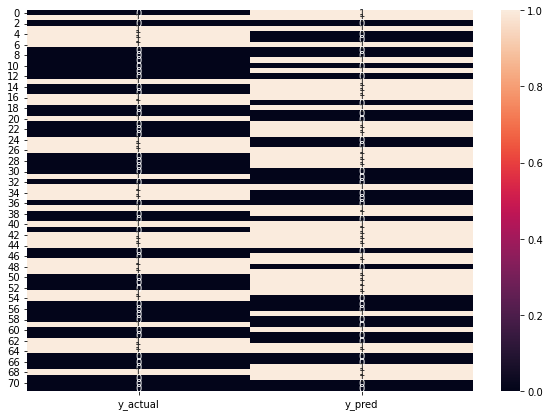

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(df_result, annot=True)

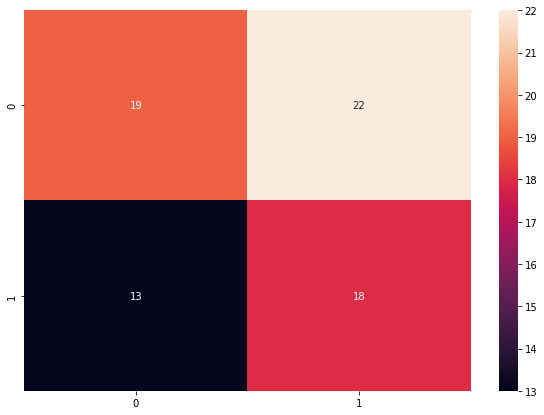

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

c_matrix = metrics.confusion_matrix(y_test_list, best_y_predict)
# print(c_matrix)
plt.figure(figsize = (10,7))
sns.heatmap(c_matrix, annot=True)